In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---------  test de plusieurs modèle de régression linéaire  ------------


##  I : test modeèle -->LinearRegression

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

df = pd.read_csv("donnees_propre.csv")


y = df['prix']

X = df[['marque', "modele",'risque_assurance', 'type_de_carburant',
       'aspiration', 'nombre_de_portes', 'carrosserie', 'roues_motrices',
       'emplacement_moteur', 'empattement', 'longueur_voiture',
       'largeur_voiture', 'hauteur_voiture', 'poids_à_vide', 'type_de_moteur',
       'nombre_de_cylindres', 'taille_moteur_en_litres',
       'système_de_carburant', 'alésage', 'course', 'taux_de_compression',
       'puissance', 'rpm_max', 'consommation_ville', 'consommation_autoroute']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20)

numeric_features = ['risque_assurance', 'nombre_de_portes', 'empattement', 'longueur_voiture',
       'largeur_voiture', 'hauteur_voiture', 'poids_à_vide', 'nombre_de_cylindres', 'taille_moteur_en_litres',
        'alésage', 'course', 'taux_de_compression',
       'puissance', 'rpm_max', 'consommation_ville', 'consommation_autoroute']

numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler()),  
])
categorial_features = ['marque', "modele",'type_de_carburant', 'aspiration',  'carrosserie','roues_motrices',
       'emplacement_moteur', 'type_de_moteur', 'système_de_carburant']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

model = LinearRegression()

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

pipe.fit(X_train, y_train)
pipe.predict(X_test)
pipe.score(X_test, y_test)


0.74715876520375

### I.2 : sur ce modèle nous pouvons apercevoir qu'y il a une anomalie à partir 3/4 du cross validation 
### ce modèle n'est pas optimal

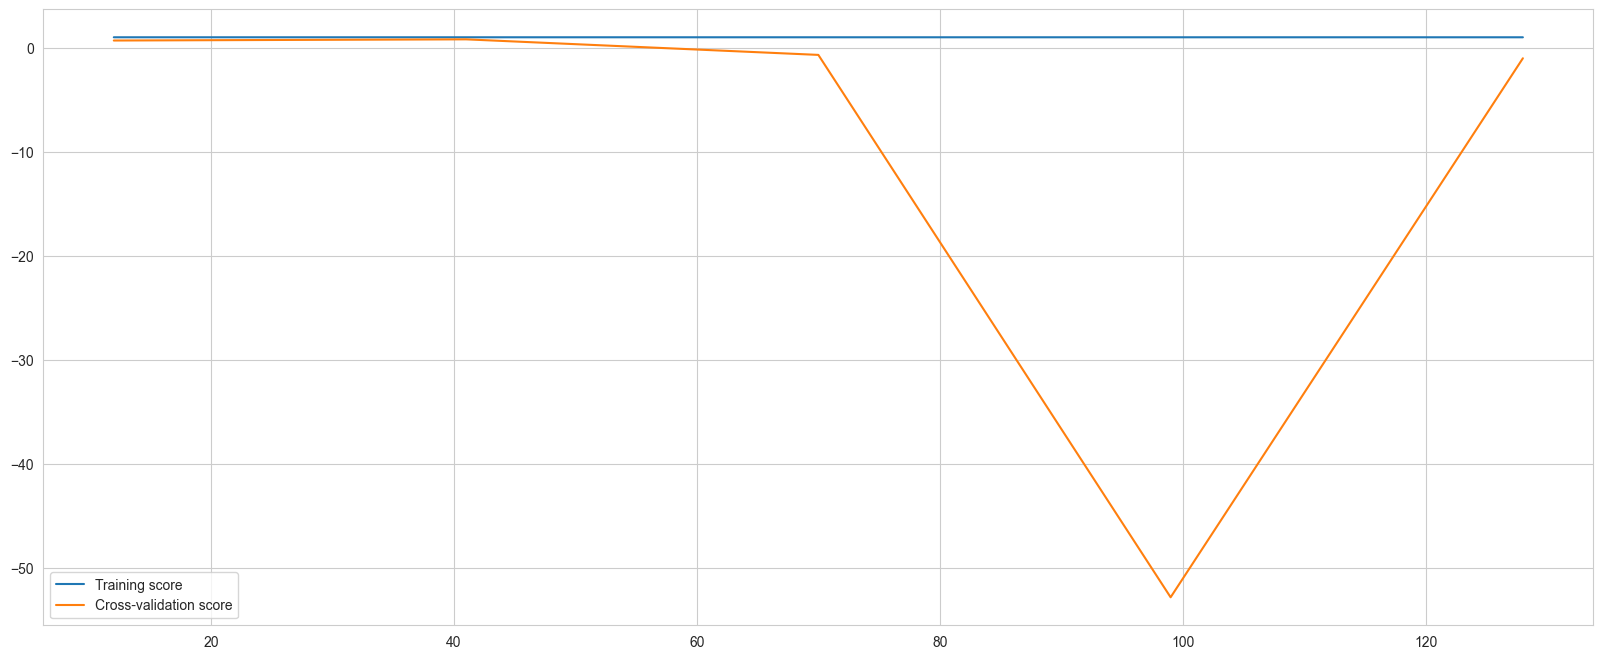

In [26]:
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve


train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(20, 8))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.legend()
plt.show()

##  II : test modeèle --> Lasso

In [29]:
# nouveau
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso

df = pd.read_csv("donnees_propre.csv")

y = df['prix']

X = df[['marque', "modele",'risque_assurance', 'type_de_carburant',
       'aspiration', 'nombre_de_portes', 'carrosserie', 'roues_motrices',
       'emplacement_moteur', 'empattement', 'longueur_voiture',
       'largeur_voiture', 'hauteur_voiture', 'poids_à_vide', 'type_de_moteur',
       'nombre_de_cylindres', 'taille_moteur_en_litres',
       'système_de_carburant', 'alésage', 'course', 'taux_de_compression',
       'puissance', 'rpm_max', 'consommation_ville', 'consommation_autoroute']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20)

numeric_features = ['risque_assurance', 'nombre_de_portes', 'empattement', 'longueur_voiture',
       'largeur_voiture', 'hauteur_voiture', 'poids_à_vide', 'nombre_de_cylindres', 'taille_moteur_en_litres',
        'alésage', 'course', 'taux_de_compression',
       'puissance', 'rpm_max', 'consommation_ville', 'consommation_autoroute']

numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler()),  
])
categorial_features = ['marque', "modele",'type_de_carburant', 'aspiration',  'carrosserie','roues_motrices',
       'emplacement_moteur', 'type_de_moteur', 'système_de_carburant']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

model = Lasso()

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

pipe.fit(X_train, y_train)
pipe.predict(X_test)
pipe.score(X_test, y_test)


0.8648874406188559

### II.2 : sur ce modèle nous pouvons apercevoir qu'y il a une anomalie cross validation augmente puis rechute puis remonte 
### ce modèle n'est pas optimal

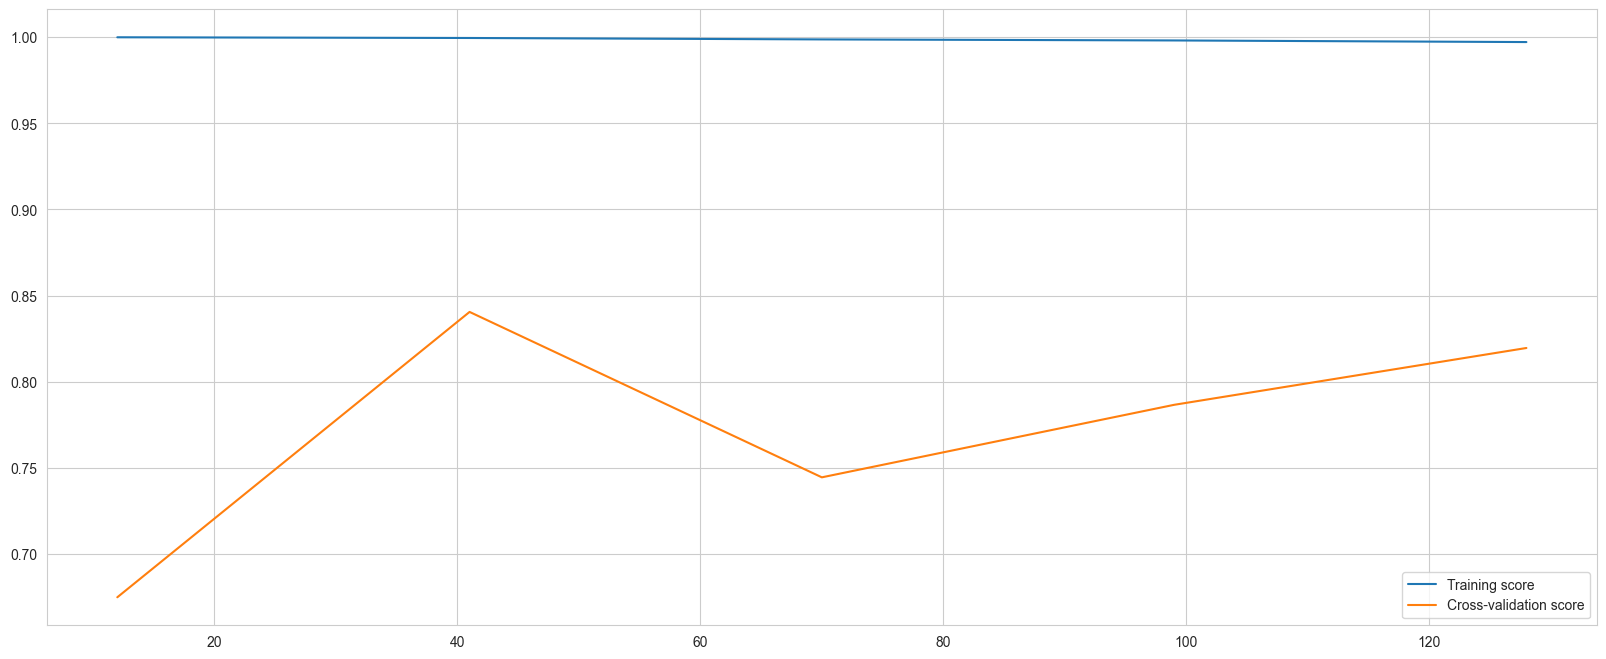

In [30]:
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve


train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(20, 8))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.legend()
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

df = pd.read_csv("donnees_propre.csv")

y = df['prix']
X = df[['marque', "modele",'risque_assurance', 'type_de_carburant',
       'aspiration', 'nombre_de_portes', 'carrosserie', 'roues_motrices',
       'emplacement_moteur', 'empattement', 'longueur_voiture',
       'largeur_voiture', 'hauteur_voiture', 'poids_à_vide', 'type_de_moteur',
       'nombre_de_cylindres', 'taille_moteur_en_litres',
       'système_de_carburant', 'alésage', 'course', 'taux_de_compression',
       'puissance', 'rpm_max', 'consommation_ville', 'consommation_autoroute']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20)

numeric_features = ['risque_assurance', 'nombre_de_portes', 'empattement', 'longueur_voiture',
       'largeur_voiture', 'hauteur_voiture', 'poids_à_vide', 'nombre_de_cylindres', 'taille_moteur_en_litres',
        'alésage', 'course', 'taux_de_compression',
       'puissance', 'rpm_max', 'consommation_ville', 'consommation_autoroute']

numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler()),  
])
categorial_features = ['marque', "modele",'type_de_carburant', 'aspiration',  'carrosserie','roues_motrices',
       'emplacement_moteur', 'type_de_moteur', 'système_de_carburant']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

model = Lasso(alpha=0.1)

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R^2 score: {:.2f}".format(r2))


R^2 score: 0.77


c:\Users\impej\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8858195.045923509, tolerance: 1102212.4804500903
  model = cd_fast.sparse_enet_coordinate_descent(


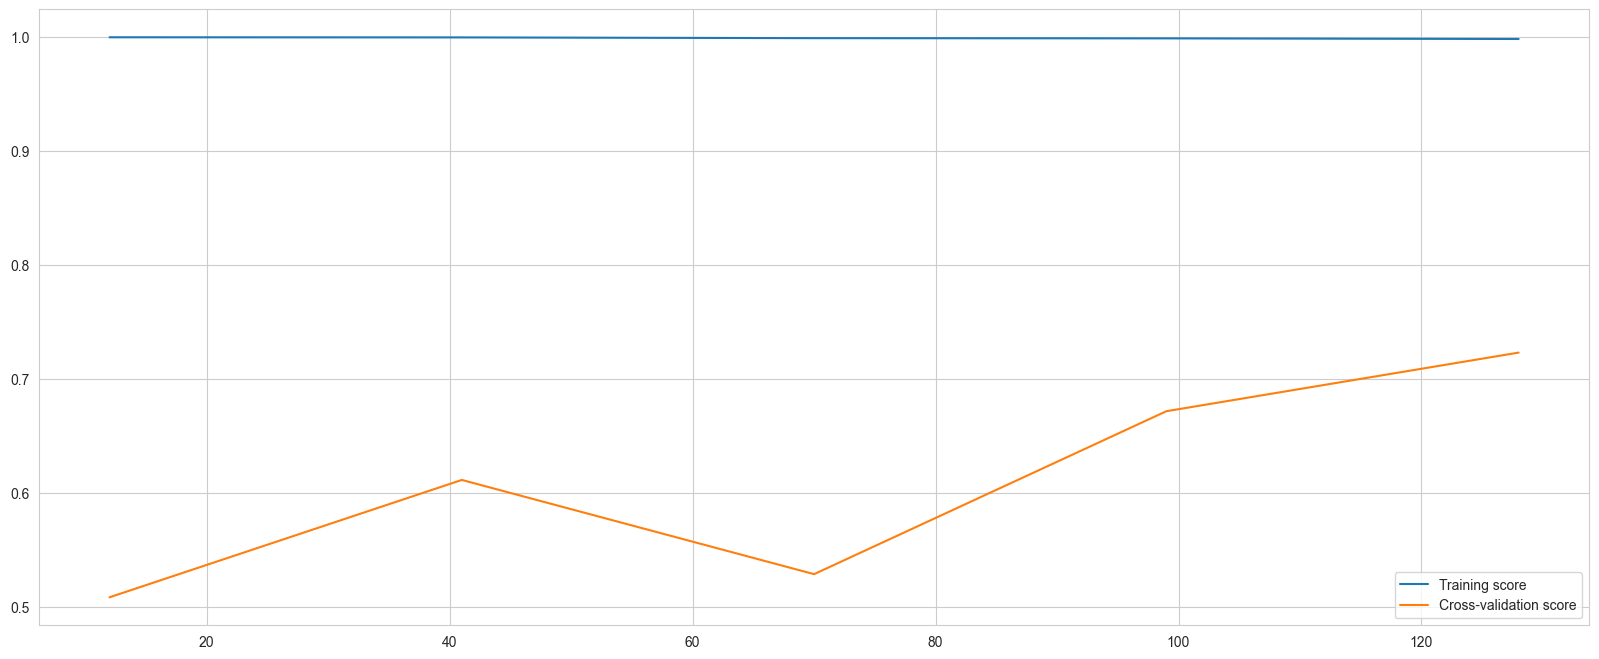

In [20]:
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve


train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(20, 8))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.legend()
plt.show()

## III : test du modèle --> Ridge

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge

# Charger les données
df = pd.read_csv("donnees_propre.csv")

# Séparer la variable cible et les caractéristiques
y = df['prix']
X = df[['marque', "modele",'risque_assurance', 'type_de_carburant',
       'aspiration', 'nombre_de_portes', 'carrosserie', 'roues_motrices',
       'emplacement_moteur', 'empattement', 'longueur_voiture',
       'largeur_voiture', 'hauteur_voiture', 'poids_à_vide', 'type_de_moteur',
       'nombre_de_cylindres', 'taille_moteur_en_litres',
       'système_de_carburant', 'alésage', 'course', 'taux_de_compression',
       'puissance', 'rpm_max', 'consommation_ville', 'consommation_autoroute']]

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20)

# Prétraitement des caractéristiques
numeric_features = ['risque_assurance', 'nombre_de_portes', 'empattement', 'longueur_voiture',
       'largeur_voiture', 'hauteur_voiture', 'poids_à_vide', 'nombre_de_cylindres', 'taille_moteur_en_litres',
        'alésage', 'course', 'taux_de_compression',
       'puissance', 'rpm_max', 'consommation_ville', 'consommation_autoroute']
numeric_transformer = Pipeline([
    ('scaler', MinMaxScaler()),
])

categorical_features = ['marque', "modele",'type_de_carburant', 'aspiration',  'carrosserie','roues_motrices',
       'emplacement_moteur', 'type_de_moteur', 'système_de_carburant']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Créer le pipeline
model = Ridge(alpha=0.5)  # alpha est le paramètre de régularisation
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Entraîner le modèle
pipe.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test et calculer le score R²
score = pipe.score(X_test, y_test)
print("Score R² : {:.2f}".format(score))


Score R² : 0.91


### III.2 : sur ce modèle nous pouvons apercevoir qu'y il a evolution crossante de la courbe cross validation 
### ce modèle est bon mais pas optimal 

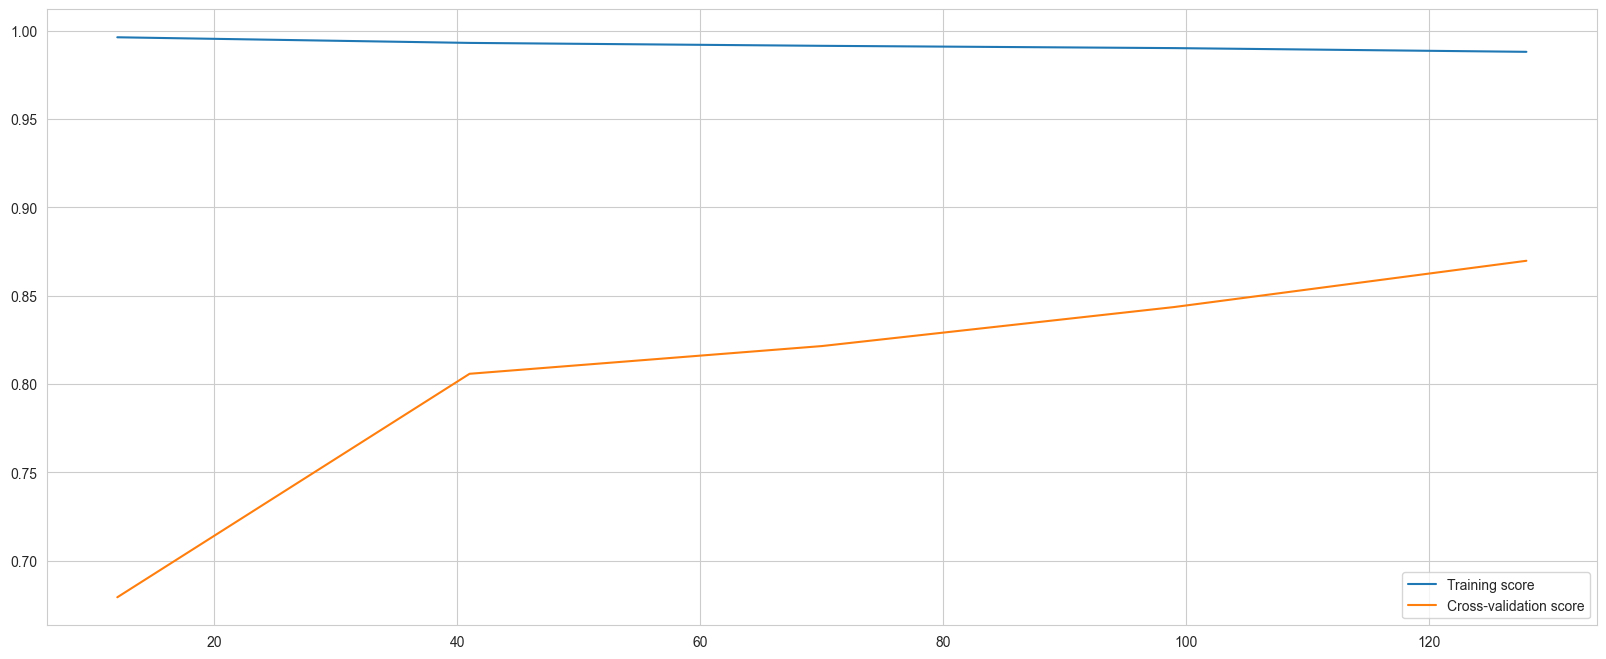

In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve


train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(20, 8))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.legend()
plt.show()

## IV test du modèle --> ElasticNet

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import ElasticNet

df = pd.read_csv("donnees_propre.csv")

y = df['prix']

X = df[['marque', "modele",'risque_assurance', 'type_de_carburant',       'aspiration', 'nombre_de_portes', 'carrosserie', 'roues_motrices',       'emplacement_moteur', 'empattement', 'longueur_voiture',       'largeur_voiture', 'hauteur_voiture', 'poids_à_vide', 'type_de_moteur',       'nombre_de_cylindres', 'taille_moteur_en_litres',       'système_de_carburant', 'alésage', 'course', 'taux_de_compression',       'puissance', 'rpm_max', 'consommation_ville', 'consommation_autoroute']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20)

numeric_features = ['risque_assurance', 'nombre_de_portes', 'empattement', 'longueur_voiture',       'largeur_voiture', 'hauteur_voiture', 'poids_à_vide', 'nombre_de_cylindres', 'taille_moteur_en_litres',        'alésage', 'course', 'taux_de_compression',       'puissance', 'rpm_max', 'consommation_ville', 'consommation_autoroute']

numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler()),  
])
categorial_features = ['marque', "modele",'type_de_carburant', 'aspiration',  'carrosserie','roues_motrices',       'emplacement_moteur', 'type_de_moteur', 'système_de_carburant']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

model = ElasticNet(alpha=0.1, l1_ratio=0.5)

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

pipe.fit(X_train, y_train)
pipe.predict(X_test)
pipe.score(X_test, y_test)


0.8730486639129976

### IV.2 : sur ce modèle nous pouvons apercevoir que les courbe se rejoint mais la Training score diminue 
### ce modèle n'est pas optimal 

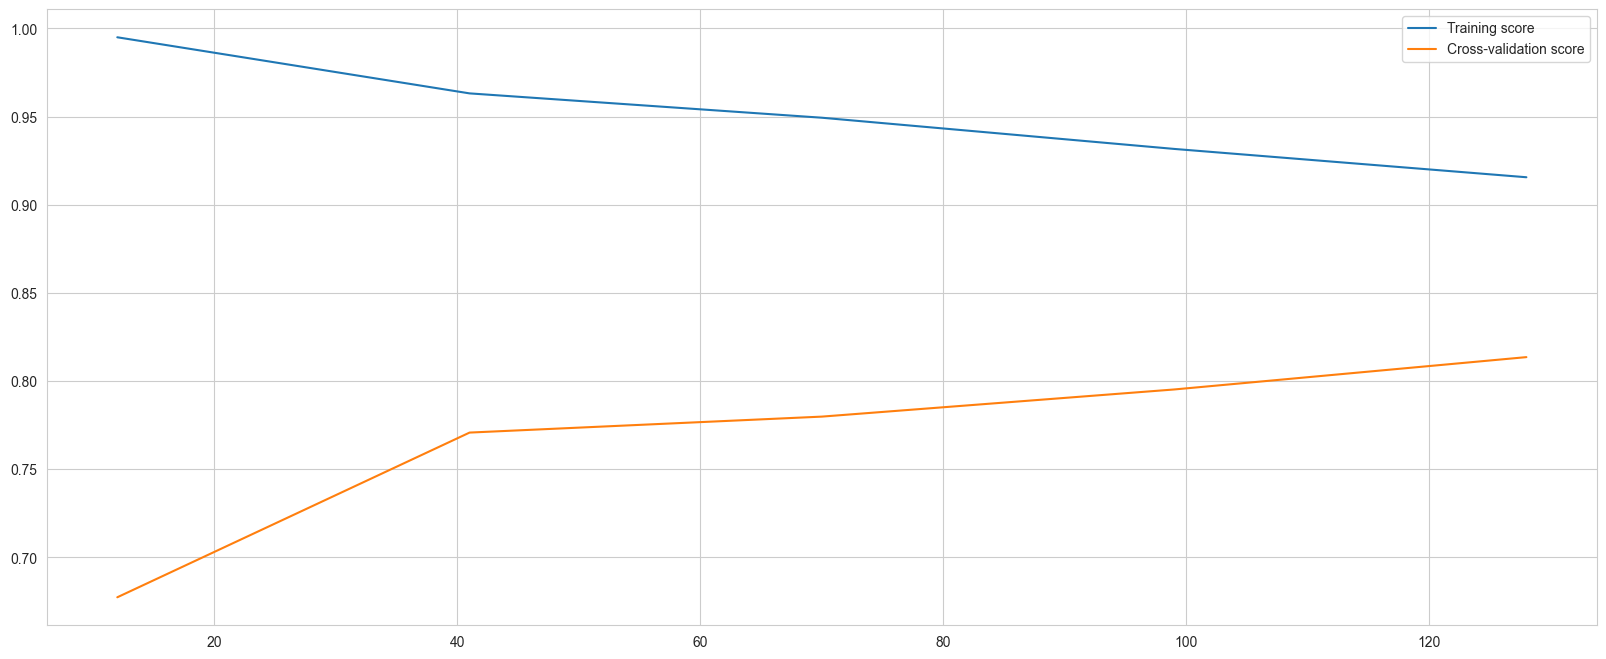

In [16]:
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve


train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(20, 8))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.legend()
plt.show()

## V test du model --> RandomForestRegressor

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("donnees_propre.csv")

y = df['prix']
X = df[['marque', "modele",'risque_assurance', 'type_de_carburant',       
        'aspiration', 'nombre_de_portes', 'carrosserie', 'roues_motrices',       
        'emplacement_moteur', 'empattement', 'longueur_voiture',       
        'largeur_voiture', 'hauteur_voiture', 'poids_à_vide', 'type_de_moteur',       
        'nombre_de_cylindres', 'taille_moteur_en_litres',       'système_de_carburant', 
         'taux_de_compression',       'puissance', 'rpm_max', 
        'consommation_ville', 'consommation_autoroute']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20)

numeric_features = ['risque_assurance', 'nombre_de_portes', 'empattement', 'longueur_voiture',
                    'largeur_voiture', 'hauteur_voiture', 'poids_à_vide', 'nombre_de_cylindres',
                    'taille_moteur_en_litres',     'taux_de_compression',  
                    'puissance', 'rpm_max', 'consommation_ville', 'consommation_autoroute']

numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler()),  
])
categorial_features = ['marque', "modele",'type_de_carburant', 'aspiration',  'carrosserie','roues_motrices',       'emplacement_moteur', 'type_de_moteur', 'système_de_carburant']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

pipe.fit(X_train, y_train)
pipe.predict(X_test)
pipe.score(X_test, y_test)
print(pipe.score(X_test, y_test))

# import pickle

# # Enregistrer le modèle KNN entraîné sous forme de fichier pickle
# with open('voiture.pkl', 'wb') as file:
#     pickle.dump(pipe, file)




0.9373648777110876


### V.2 : sur ce modèle nous pouvons apercevoir que  la Training score augmentes  
### ce modèle est a le meilleur resultat 0.937 sur 1  

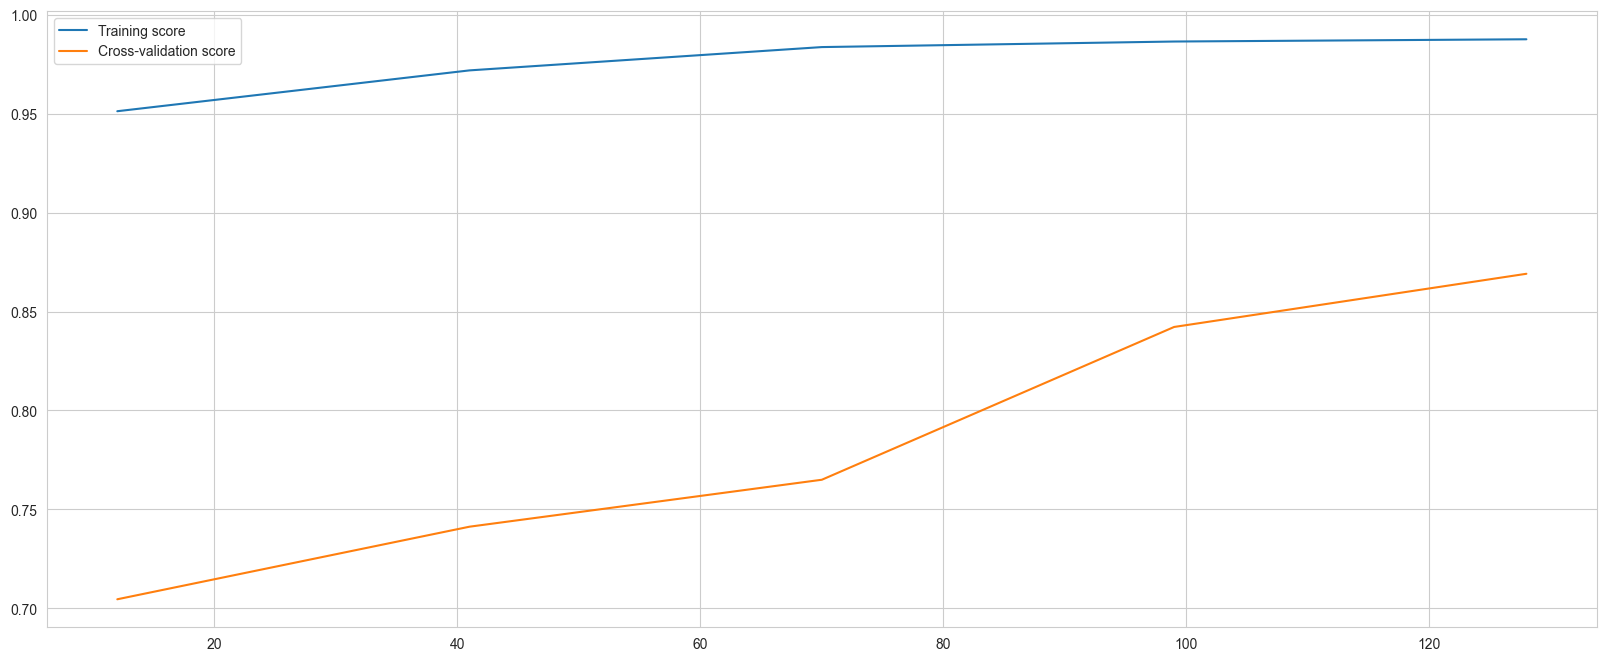

In [14]:
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve


train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(20, 8))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.legend()
plt.show()


# code avec moins de selecteur et optimisation des parametre 

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("donnees_propre.csv")

y = df['prix']
X = df[['marque', 'modele', 'type_de_carburant', 'aspiration', 'nombre_de_portes', 'carrosserie', 'roues_motrices', 'emplacement_moteur', 
         'type_de_moteur', 'nombre_de_cylindres', 'taille_moteur_en_litres', 'puissance', 'rpm_max', 'consommation_ville', 
        'consommation_autoroute']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20)

numeric_features = ['nombre_de_portes',  'nombre_de_cylindres', 'taille_moteur_en_litres', 'puissance', 'rpm_max', 'consommation_ville', 'consommation_autoroute']
numeric_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_features = ['marque', 'modele', 'type_de_carburant', 'aspiration', 'carrosserie', 'roues_motrices', 'emplacement_moteur', 'type_de_moteur']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = RandomForestRegressor(n_estimators=200, random_state=21)

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=4221)

pipe.fit(X_train, y_train)
pipe.predict(X_test)
pipe.score(X_test, y_test)
print(pipe.score(X_test, y_test))

# import pickle

# # Enregistrer le modèle KNN entraîné sous forme de fichier pickle
# with open('voiture.pkl', 'wb') as file:
#     pickle.dump(pipe, file)


0.9181598923153576


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import sqlite3
import numpy as np

connexion = sqlite3.connect("../voiture.db")
df = pd.read_sql_query("SELECT * FROM voiture", connexion)

y = df['prix']
X = df[['marque', 'modele', 'type_de_carburant', 'aspiration', 'nombre_de_portes', 'carrosserie', 'roues_motrices', 'emplacement_moteur', 
         'type_de_moteur', 'nombre_de_cylindres', 'taille_moteur_en_litres', 'puissance', 'rpm_max', 'consommation_ville', 
        'consommation_autoroute']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20)

numeric_features = ['nombre_de_portes',  'nombre_de_cylindres', 'taille_moteur_en_litres', 'puissance', 'rpm_max', 'consommation_ville', 'consommation_autoroute']
numeric_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_features = ['marque', 'modele', 'type_de_carburant', 'aspiration', 'carrosserie', 'roues_motrices', 'emplacement_moteur', 'type_de_moteur']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = RandomForestRegressor(n_estimators=100, 
                              max_depth=None, 
                              min_samples_split=5, 
                              min_samples_leaf=1, 
                              random_state=21)

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=666)

pipe.fit(X_train, y_train)
pipe.predict(X_test)
pipe.score(X_test, y_test)
print(pipe.score(X_test, y_test))
# Make a single prediction on the test data
predicted_price = pipe.predict(X_test.iloc[[16]])



# Get the actual price from the database for the corresponding test data
actual_price_query = f"SELECT prix FROM voiture WHERE marque='{X_test.iloc[[0]]['marque'][0]}' AND modele='{X_test.iloc[[0]]['modele'][0]}'"
actual_price = pd.read_sql_query(actual_price_query, connexion)['prix'][0]
diff_percent = abs(predicted_price[0] - actual_price) / actual_price * 100

# Print the predicted and actual prices
print("Predicted prix:", round(predicted_price[0],2))
print("Actual prix:", actual_price)
print("Percentage difference:", round(diff_percent, 2), "%")


# print(model.get_params())

# import pickle

# # Enregistrer le modèle KNN entraîné sous forme de fichier pickle
# with open('../voiture.pkl', 'wb') as file:
#     pickle.dump(pipe, file)


0.9202592510620423
Predicted prix: 13770.6
Actual prix: 13495.0
Percentage difference: 2.04 %


In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)



{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100}


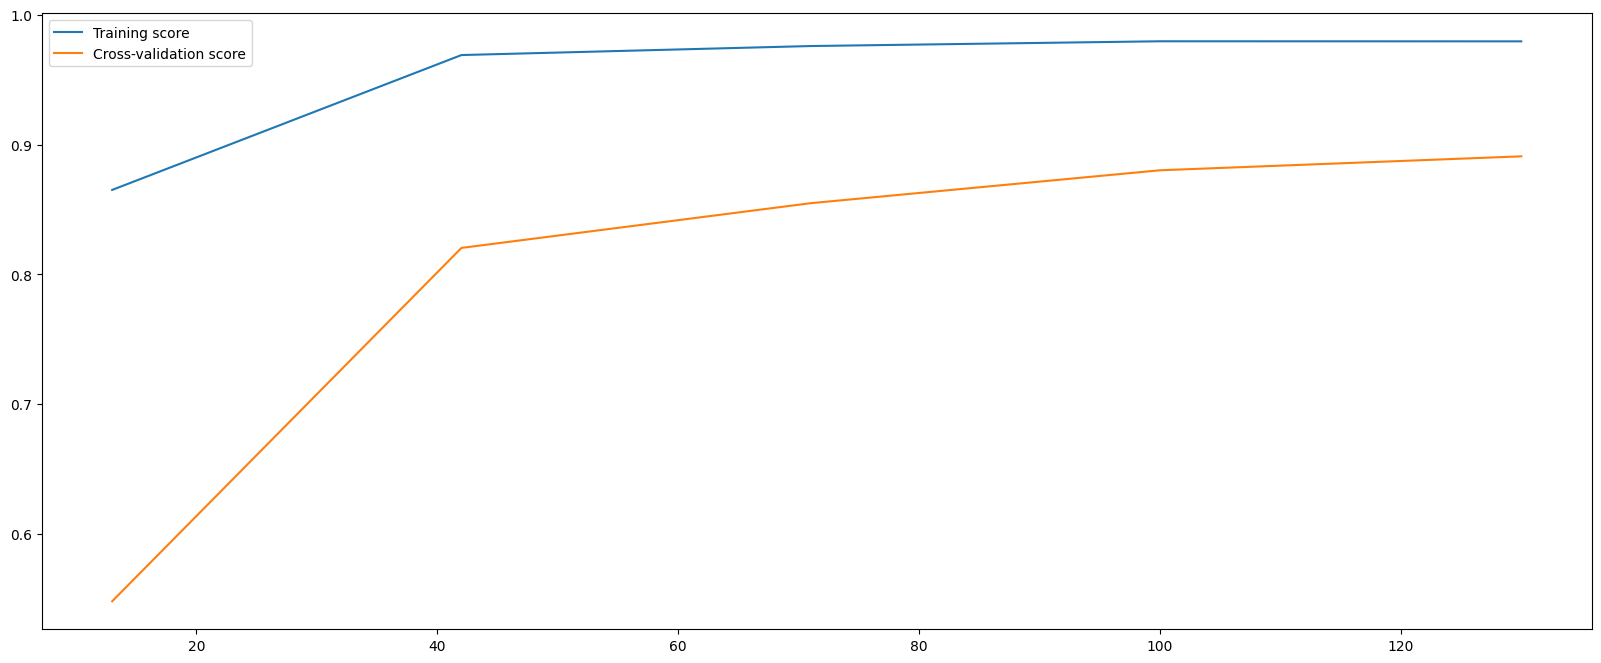

[ 13  42  71 100 130]


In [9]:
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
import numpy as np



train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(20, 8))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.legend()
plt.show()
print(train_sizes)